Validation of the ML-model by evaluating a set of lactate dehydrogenases. The dataset of lactate dehydrogenases is from:
Fields, P. A.; Somero, G. N. Hot Spots in Cold Adaptation: Localized Increases in Conformational Flexibility in Lactate Dehydrogenase A4 Orthologs of Antarctic Notothenioid Fishes. Proceedings of the National Academy of Sciences 1998, 95 (19), 11476–11481. https://doi.org/10.1073/pnas.95.19.11476.


In [58]:
import glob
import uniprot
import pandas

accessionSeqSpecies=dict()
for file in glob.glob("*.fasta"):
    seqids, fastas = uniprot.read_fasta(file)
    species=fastas[seqids[0]]["description"].split("OS=")[1].split(" OX")[0]
    print(species)
    accessionSeqSpecies[seqids[0]]=[fastas[seqids[0]]["sequence"],species]


Meleagris gallopavo
Sphyraena argentea
Sphyraena lucasana
Harpagifer antarcticus
Parachaenichthys charcoti
Gobionotothen gibberifrons
Champsocephalus gunnari
Eleginops maclovinus
Dissostichus mawsoni
Lindbergichthys nudifrons
Patagonotothen tessellata
Gallus gallus
Squalus acanthias
Bos taurus
Chaenocephalus aceratus
Chionodraco rastrospinosus
Gillichthys mirabilis
Dipsosaurus dorsalis
Hippoglossus stenolepis


In [59]:
df = pandas.DataFrame.from_dict(accessionSeqSpecies,orient="index",columns=["sequence","species"])

In [60]:
len(df)

19

In [61]:
###1, P. charcoti; 2, L. nudifrons; 3, C. gunnari; 4, H.
##antarcticus; 5, P. tessellata; 6, E. maclovinus; 7, S. mystinus (rockfish);
###8, Hippoglossus stenolepis (halibut) (28); 9, Sphyraena argentea (barracuda) (18); 10, Squalus acanthias (dogfish) (28); 11, Sphyraena
###lucasana (18); 12, Gillichthys mirabilis (goby) (2); 13, Thunnus thynnus
###(bluefin tuna) (28); 14, Sphyraena ensis (18); 15, Bos taurus (cow) (28);
###16, Gallus gallus (chicken) (28); 17, Meleagris gallopavo (turkey) (28);
##18, D. dorsalis (desert iguana).
bodytemperatureCelsius=[38,19,21,0,0,0,0,6,0,0,6,38,20,38,0,0,24,42,6]
bodytemperaturesKelvin=[x+273 for x in bodytemperatureCelsius]
df["bodytemperatureKelvin"]=bodytemperaturesKelvin
df["invbodytemperatureKelvin"]=1/df["bodytemperatureKelvin"]
df

,sequence,species,bodytemperatureKelvin,invbodytemperatureKelvin
tr|G1N679,MLCTMSLKDHLIHNVHKEEHPHAHNKISVVGVGAVGMACAISILMK...,Meleagris gallopavo,311,0.003215
sp|O13276,MSTKEKLIGHVMKEEPIGSRNKVTVVGVGMVGMASAVSILLKDLCD...,Sphyraena argentea,292,0.003425
sp|O13278,MSTKEKLIDHVMKEEPIGSRNKVTVVGVGMVGMASAVSILLKDLCD...,Sphyraena lucasana,294,0.003401
sp|O93537,MSTKEKLISHVMKEEPVGSRNKVTVVGVGMVGMASAISILIKDLGD...,Harpagifer antarcticus,273,0.003663
sp|O93538,MSTKEKLISHVMKEEPVGSRNKVTVVGVGMVGMASAISILLKDLCD...,Parachaenichthys charcoti,273,0.003663
sp|O93540,MSTKEKLISHVMKEEPVGSRNKVTVVGVGMVGMASAISILLKDLCD...,Gobionotothen gibberifrons,273,0.003663
sp|O93541,MSTKEKLISHVMKEEPVGSRSKVTVVGVGMVGMASAISILLKDLCD...,Champsocephalus gunnari,273,0.003663
sp|O93542,MSTKEKLISHVMKEEPVGSRNKVTVVGVGMVGMASAISILLKDLCD...,Eleginops maclovinus,279,0.003584
sp|O93544,MSTKEKLISHVMKEEPVGSRNKVTVVGVGMVGMASAISILLKDLCD...,Dissostichus mawsoni,273,0.003663
sp|O93545,MSTKEKLISHVMKEEPVGSRSKVTVVGVGMVGMASAISILLKDLCD...,Lindbergichthys nudifrons,273,0.003663


In [62]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import pickle
with open("../psychornot-pipeline", 'rb') as pipeline_file:
    pipeline = pickle.load(pipeline_file)
model = keras.models.load_model("../psychornot-ensemble")

C:\Users\jlu\AppData\Local\Temp\ipykernel_4916\4220173251.py:6: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  pipeline = pickle.load(pipeline_file)


In [70]:
X_t = pipeline.transform(df["sequence"].to_list()).toarray()
# Our model currently predicts the probability of the enzyme being psychrophile,
# but we want the probability of it being thermophile:
df[["MLscore"]]= 1 - model.predict(X_t)
df["logMLscore"] = np.log(df["MLscore"])



1/1 [==============================] - 0s 37ms/step


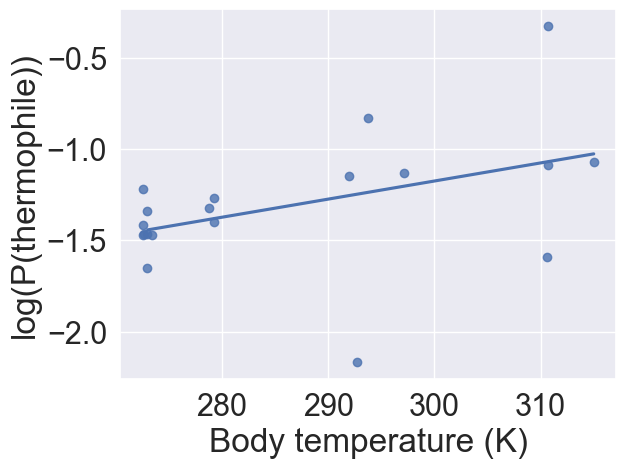

In [86]:
import seaborn as sns
sns.set(font_scale = 2)
ax=sns.regplot(x="bodytemperatureKelvin",y="logMLscore",data=df,x_jitter=.5,ci=None)


fig=ax.get_figure()
ax.set_xlabel("Body temperature (K)")
ax.set_ylabel("log(P(thermophile))")
fig.savefig("dogfishes-ML.png")

In [87]:
r=df["bodytemperatureKelvin"].corr(df["logMLscore"])
r

0.42615202752589765

In [88]:
n=len(df)
n

19

In [89]:
ttest= (r*np.sqrt(n-2)) / np.sqrt(1-r**2)
ttest

1.9422614131236149

In [90]:
df

,sequence,species,bodytemperatureKelvin,invbodytemperatureKelvin,MLscore,logMLscore
tr|G1N679,MLCTMSLKDHLIHNVHKEEHPHAHNKISVVGVGAVGMACAISILMK...,Meleagris gallopavo,311,0.003215,0.719501,-0.329198
sp|O13276,MSTKEKLIGHVMKEEPIGSRNKVTVVGVGMVGMASAVSILLKDLCD...,Sphyraena argentea,292,0.003425,0.317701,-1.146646
sp|O13278,MSTKEKLIDHVMKEEPIGSRNKVTVVGVGMVGMASAVSILLKDLCD...,Sphyraena lucasana,294,0.003401,0.435324,-0.831665
sp|O93537,MSTKEKLISHVMKEEPVGSRNKVTVVGVGMVGMASAISILIKDLGD...,Harpagifer antarcticus,273,0.003663,0.295743,-1.218264
sp|O93538,MSTKEKLISHVMKEEPVGSRNKVTVVGVGMVGMASAISILLKDLCD...,Parachaenichthys charcoti,273,0.003663,0.192131,-1.649579
sp|O93540,MSTKEKLISHVMKEEPVGSRNKVTVVGVGMVGMASAISILLKDLCD...,Gobionotothen gibberifrons,273,0.003663,0.261206,-1.342445
sp|O93541,MSTKEKLISHVMKEEPVGSRSKVTVVGVGMVGMASAISILLKDLCD...,Champsocephalus gunnari,273,0.003663,0.242267,-1.417717
sp|O93542,MSTKEKLISHVMKEEPVGSRNKVTVVGVGMVGMASAISILLKDLCD...,Eleginops maclovinus,279,0.003584,0.281207,-1.268663
sp|O93544,MSTKEKLISHVMKEEPVGSRNKVTVVGVGMVGMASAISILLKDLCD...,Dissostichus mawsoni,273,0.003663,0.230269,-1.468507
sp|O93545,MSTKEKLISHVMKEEPVGSRSKVTVVGVGMVGMASAISILLKDLCD...,Lindbergichthys nudifrons,273,0.003663,0.229326,-1.472612
